## Lego data Analysis

<b>Let's look at Lego sets!</b>
Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

let's become familiar with the two datasets that will help you with this project:


### datasets/lego_sets.csv
#### set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
#### set_name: A name for every set in the dataset (note that this can be the same for different sets).
#### year: The date the set was released.
#### num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
#### theme_name: The name of the sub-theme of the set.
#### parent_theme: The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.

### datasets/parent_themes.csv
#### id: A code that is unique to every theme.
#### name: The name of the parent theme.
#### is_licensed: A Boolean column specifying whether the theme is a licensed theme.


## Goals 


#### 1. Basic exploration of the dataset
#### 2. What percentage of all licensed sets ever released were Star Wars Themed?
#### 3. In which year was Star Wars not the most popular licensed theme?
#### 4. Bonus : How many unique sets were released each year 1955-2017?

###### All the libraries to be imported

In [29]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

###### Exploring all the data that were shared and reading the data from the input

In [30]:
for file in os.listdir('./datasets/'):
    print(file)

lego_sets.csv
parent_themes.csv
sets.csv
themes.csv


In [31]:
lego_sets = pd.read_csv('./datasets/lego_sets.csv')
parent_theme = pd.read_csv('./datasets/parent_themes.csv')
sets = pd.read_csv('./datasets/sets.csv')
theme = pd.read_csv('./datasets/themes.csv')

###### Exploring lego_sets and cleaning data if required

In [32]:
lego_sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [33]:
lego_sets.describe()

,year,num_parts
count,11986.000000,6926.000000
mean,2002.304772,163.782558
std,13.471680,334.206873
min,1950.000000,-1.000000
25%,1997.000000,10.250000
50%,2006.000000,46.000000
75%,2013.000000,173.000000
max,2017.000000,5922.000000


In [34]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [35]:
lego_sets.isna().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [38]:
# set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
# Analysing data with no set_num

#lego_sets.loc[ lego_sets['set_num'].isna() ]
lego_sets[lego_sets['set_num'].isna()].index
lego_sets.drop(lego_sets[lego_sets['set_num'].isna()].index,axis=0, inplace=True)

#lego_sets.loc[ lego_sets['set_num'].isna() ]

In [39]:
lego_sets.isna().sum()

set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
dtype: int64

In [42]:
lego_sets.name.nunique()

#10512

10512

###### Exploring themes and cleaning data if required

In [46]:
parent_theme.head(10)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


In [48]:
parent_theme.describe()

,id
count,111.000000
mean,405.270270
std,145.444394
min,1.000000
25%,298.500000
50%,411.000000
75%,505.500000
max,610.000000


In [52]:
parent_theme.count() #### 111
#parent_theme.name.nunique() #### 111

id             111
name           111
is_licensed    111
dtype: int64

In [53]:
parent_theme.isna().sum()

id             0
name           0
is_licensed    0
dtype: int64

<B> What percentage of all licensed sets ever released were Star Wars Themed? <B>

In [55]:
licensed = parent_theme[ parent_theme['is_licensed'] == True]
licensed

,id,name,is_licensed
7,158,Star Wars,True
12,246,Harry Potter,True
16,263,Pirates of the Caribbean,True
17,264,Indiana Jones,True
18,269,Cars,True
19,270,Ben 10,True
20,271,Prince of Persia,True
21,272,SpongeBob SquarePants,True
23,275,Toy Story,True
33,317,Avatar,True


In [56]:
num_licensed = licensed.count()


In [61]:
lego_theme = lego_sets.merge(parent_theme, left_on='parent_theme', right_on='name', suffixes=['_lego', '_theme'],how='left')

In [62]:
lego_theme

,set_num,name_lego,year,num_parts,theme_name,parent_theme,id,name_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
...,...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,LEGO Brand Store,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,Promotional,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,LEGO Brand Store,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,Friends,False


In [64]:
lego_theme_licensed = lego_theme[ lego_theme['is_licensed'] == True]
lego_theme_licensed

,set_num,name_lego,year,num_parts,theme_name,parent_theme,id,name_theme,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,Star Wars,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,Star Wars,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,Super Heroes,True
...,...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,Star Wars,True
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,Star Wars,True
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,Star Wars,True


In [74]:
import re 
num_licensed = lego_theme_licensed.shape[0]
num_sw = lego_theme_licensed[lego_theme_licensed['parent_theme'].str.contains('Star Wars', flags=re.I, regex=True)].shape[0]

In [78]:
print (round((num_sw/num_licensed) *100,3))

51.654


In [84]:
theme_sales_by_year = lego_theme_licensed.groupby(['year', 'parent_theme'], as_index=False).agg(total_sales = ('parent_theme', 'count')).sort_values(['year','total_sales'], ascending=False)

###### SQL ROW_NUMBER operation using cumcount() to find the sales partitioned by year 

In [91]:
theme_sales_by_year['sales_rank'] = theme_sales_by_year.sort_values(['year','total_sales'], ascending=False).groupby(['year']).cumcount() + 1

In [92]:
theme_sales_by_year.head(10)

,year,parent_theme,total_sales,sales_rank
82,2017,Super Heroes,72,1
81,2017,Star Wars,55,2
79,2017,Minecraft,9,3
78,2017,Disney Princess,6,4
80,2017,Pirates of the Caribbean,1,5
76,2016,Star Wars,61,1
77,2016,Super Heroes,33,2
72,2016,Disney Princess,11,3
74,2016,Minecraft,7,4
70,2016,Angry Birds,6,5


In [99]:
theme_sales_by_year[ (theme_sales_by_year['parent_theme'] == 'Star Wars') & (theme_sales_by_year['sales_rank'] != 1)][['year']]

,year
81,2017


###### How many unique sets were released each year 1955-2017?

In [102]:
#lets make sure the 'set_num' was not duplicated

lego_sets.duplicated(subset=['set_num']).sum() ###0

0

In [117]:
lego_set_year = lego_sets.groupby('year', as_index=False).agg({'set_num':'count'}).sort_values('year')

In [134]:
#pd.set_option('display.max_rows', None)
lego_set_year

,year,set_num
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,593
62,2014,715
63,2015,670
64,2016,608


In [119]:
pd.set_option('display.max_rows', 10)
lego_set_year

,year,set_num
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,593
62,2014,715
63,2015,670
64,2016,608


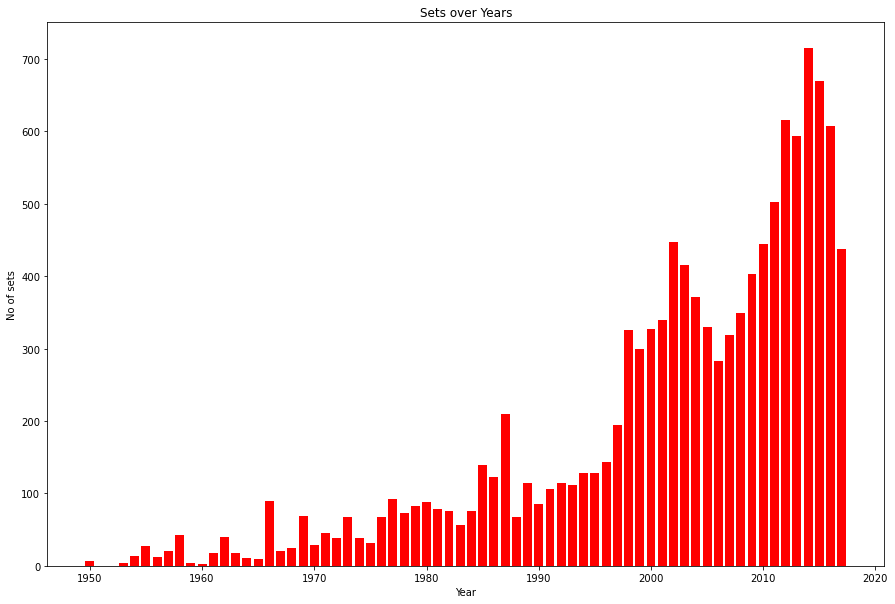

In [133]:
years = lego_set_year.year
sets = lego_set_year.set_num

plt.figure(figsize=(15,10))

plt.bar(years, sets, color='red')

plt.title('Sets over Years')

plt.xlabel('Year')
plt.ylabel('No of sets')
plt.show()

In [144]:
#lego_theme.drop(columns='id', inplace=True)
lego_theme

,set_num,name_lego,year,num_parts,theme_name,parent_theme,name_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,Space,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,LEGO Brand Store,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,Promotional,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,LEGO Brand Store,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,Friends,False


In [151]:
theme_pair = lego_theme[['set_num','year','theme_name','parent_theme']]

###### Best theme pairs 

In [152]:
theme_pair.groupby(['theme_name','parent_theme'], as_index=True).agg(total_count = ('set_num','count')).sort_values('total_count', ascending=False).head(5)

,,total_count
theme_name,parent_theme,
Duplo,Duplo,260
Gear,Gear,246
Supplemental,Classic,241
City,Seasonal,229
Friends,Friends,206


In [163]:
only_duplo = theme_pair[(theme_pair['theme_name'] == 'Duplo') & (theme_pair['parent_theme'] == 'Duplo')].groupby(['theme_name','parent_theme', 'year'], as_index=True).agg(total_count = ('set_num','count')).sort_values('total_count', ascending=False).head(5)

In [164]:
only_duplo[only_duplo['total_count'].max() == only_duplo['total_count']]

total_count
theme_name parent_theme year             
Duplo      Duplo        2015           36
                        2014           36

In [166]:
lego_part = lego_theme[['name_lego', 'num_parts']]

In [168]:
lego_part.fillna(0, inplace=True)

C:\Users\rajchand\AppData\Local\Temp\ipykernel_16180\2719570294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_part.fillna(0, inplace=True)


In [171]:
lego_part.groupby('name_lego', as_index=False).agg(total_parts = ('num_parts', 'sum')).sort_values('total_parts', ascending=False)

,name_lego,total_parts
1678,Basic Building Set,6890.0
9181,Taj Mahal,5922.0
10300,Window Exploration Bag,5200.0
6230,Millennium Falcon - UCS,5195.0
7998,Sandcrawler,4973.0
...,...,...
5012,Kayak,0.0
10511,{Yellow Cab},0.0
10363,"Wooden Storage Box Large, Empty",-1.0
3347,"Duplo Cars Super Pack 3 in 1 (5816, 5817, 5818)",-1.0


In [173]:
lego_part = lego_theme[['name_lego', 'num_parts', 'is_licensed']]

In [175]:
lego_part.groupby('is_licensed', as_index=False).agg(total_parts = ('num_parts', 'sum')).sort_values('total_parts', ascending=False)

,is_licensed,total_parts
0,False,903798.0
1,True,204491.0


In [191]:
lego_part = lego_theme[['name_lego','year', 'num_parts', 'is_licensed']]

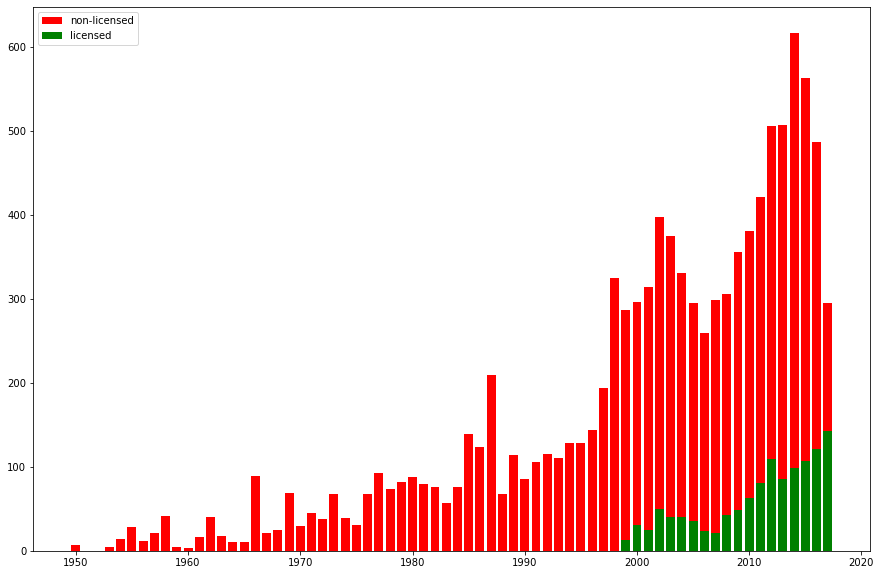

In [231]:
licensed_y = lego_theme[lego_theme['is_licensed'] == True]
licensed_n = lego_theme[lego_theme['is_licensed'] == False]

licensed_y = licensed_y.groupby(['year'], as_index=False).agg(total_parts = ('is_licensed', 'count')).sort_values('year', ascending=True)
licensed_n = licensed_n.groupby(['year'], as_index=False).agg(total_parts = ('is_licensed', 'count')).sort_values('year', ascending=True)

year_y = licensed_y.year.values
total_part_y = licensed_y.total_parts.values

year_n = licensed_n.year.values
total_part_n = licensed_n.total_parts.values

plt.figure(figsize=(15,10))

plt.bar(year_n, total_part_n, color='red', label='non-licensed')
plt.bar(year_y, total_part_y, color='green', label='licensed')

plt.legend()
plt.show()
#plt.bar()

In [187]:
lego_part.groupby(['year','is_licensed'], as_index=False).agg(total_parts = ('is_licensed', 'count')).sort_values('year', ascending=True)

,year,is_licensed,total_parts
0,1950,False,7
1,1953,False,4
2,1954,False,14
3,1955,False,28
4,1956,False,12
...,...,...,...
80,2015,True,107
81,2016,False,487
82,2016,True,121
83,2017,False,295


In [236]:
licensed_y[ licensed_y.year.min() == licensed_y.year ]

,year,total_parts
0,1999,13


,name_lego,year,num_parts,is_licensed
0,Weetabix Castle,1970,471.0,False
1,Town Mini-Figures,1978,NaN,False
2,Castle 2 for 1 Bonus Offer,1987,NaN,False
3,Space Mini-Figures,1979,12.0,False
4,Space Mini-Figures,1979,12.0,False
...,...,...,...,...
11828,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,False
11829,Micro White House,2015,NaN,False
11830,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,False
11831,Wishing Well [Toys R Us Promo],2013,NaN,False


In [383]:
#yearly_license = lego_part.groupby(['year','is_licensed'], as_index=False).agg(total_parts = ('num_parts', 'sum')).unstack(fill_value=0).stack
yearly_license = lego_part.groupby(['year','is_licensed'])['num_parts'].count().unstack(fill_value=0).reset_index()
#yearly_license = lego_part.pivot_table( columns=['year','is_licensed'], aggfunc='sum', fill_value=0).stack().reset_index()
yearly_license.sort_values(['year'], ascending=[True])
#yearly_license.T



is_licensed,year,False,True
0,1950,3,0
1,1953,1,0
2,1954,7,0
3,1955,18,0
4,1956,9,0
...,...,...,...
61,2013,297,52
62,2014,362,52
63,2015,334,58
64,2016,276,58


In [381]:
yearly_license['licenced_%'] = (yearly_license[True] / (yearly_license[False] + yearly_license[True]))*100
#yearly_license.groupby('year', as_index=False).agg(licence_ratio=(0,'sum'))


In [375]:
yearly_license['licenced_ratio'] = yearly_license[True] / yearly_license[False]

In [376]:
yearly_license

is_licensed,year,False,True,licenced_%,licenced_ratio
0,1950,3,0,0.000000,0.000000
1,1953,1,0,0.000000,0.000000
2,1954,7,0,0.000000,0.000000
3,1955,18,0,0.000000,0.000000
4,1956,9,0,0.000000,0.000000
...,...,...,...,...,...
61,2013,297,52,14.899713,0.175084
62,2014,362,52,12.560386,0.143646
63,2015,334,58,14.795918,0.173653
64,2016,276,58,17.365269,0.210145
